In [43]:
library(dplyr)

In [44]:
library(MASS)

In [42]:
library(caret) #sample
library(nnet) #인공신경망 , 다항 로지스틱 회귀분석
library(e1071) # svm
library(randomForest) # randomForest
library(party) # 의사결정나무 ctree



In [158]:


#입력 데이터, 정규화할 컬럼인덱스 벡터
fun_x <- function(f_df,cindex,targetcol){

    
# 표준화

f_df2 <- f_df
f_df2[,cindex] <- as.data.frame(scale(f_df[,cindex]))

# 샘플나누기

tindex = 0
for(i in 1:ncol(f_df2)){
    if(colnames(f_df2)[i] == targetcol){
        tindex = i
    }
}
    
sampling <- function(){
samp <<- createDataPartition(f_df2[,tindex] , p = 0.7,list = F)
data.tr <<- f_df2[samp,]
data.test <<- f_df2[-samp,]

x <<- data.test[,-tindex]
y <<- data.test[,tindex]
    
}    
    
set.seed(1235)

sampling() 
    
head(samp)

#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    
    model.nnet <- nnet(cluster ~ . , data=data.tr, size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("인공신경망의 예측력은" ,mean(pred == y), "입니다.")
#     print(pred)
    print(table(pred,y))
    return(mean(pred == y))
}

#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(cluster ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("의사결정 나무의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(cluster ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("랜덤포레스트 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(cluster ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("SVM의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(cluster ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("로지스틱 회귀의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

 a <- rep(0,5)
b<- rep(0,5)
iteration <- 20
    
data.test2 <- f_df2[samp,]

x2 <- data.test2[,-tindex]
y2 <- data.test2[,tindex]
for(i in 1:iteration){
    set.seed(i)
    a = a + c(
            ANN(data.tr , data.test , x , y ),
            CTREE(data.tr , data.test , x , y ),
             RandomForest(data.tr , data.test , x , y ),
            SVM(data.tr , data.test , x , y ),
            Logisticreg(data.tr , data.test , x , y )
    )
    b = b + c(
        ANN(data.tr , data.test2 , x2 , y2 ),
        CTREE(data.tr , data.test2 , x2 , y2 ),
         RandomForest(data.tr , data.test2 , x2 , y2 ),
        SVM(data.tr , data.test2 , x2 , y2 ),
        Logisticreg(data.tr , data.test2 , x2 , y2 )
    )
}
print(a)
print(b)
a<- a/iteration
b<- b/iteration

result<<-data.frame(train = b,test = a)
 rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
#rownames(result) = c("인공신경망","의사결정나무","SVM","로지스틱회귀분석")
result
}




In [1]:

df <-read.csv("../movies2/fortest5.csv",fileEncoding = 'utf-8')

df10<-df
head(df)


cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5,조연점수,평균스크린점유율,평스_증가율,감독점수2,감독점수3,주연점수2,조연점수2
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,8.00,20.39078,40.117994,2.000000,6,2.000000,2.600000
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019,12.25,46.11887,9.748892,4.000000,4,2.750000,3.250000
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000,10.60,33.81410,20.119225,3.000000,9,2.000000,3.000000
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250,10.60,31.98603,22.956522,2.714286,19,2.333333,3.000000
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456,14.50,19.43888,25.581395,2.500000,5,2.500000,3.500000
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510,11.50,27.43873,8.014572,4.000000,4,2.500000,3.166667


In [373]:
head(df10[,-c(2,9,10,11,12,13,14,15,16,17,18)])

cluster,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,조연점수2
1,23.79760,2,10,3,3.000000,4.000000,2.600000
1,48.26242,2,10,8,2.000000,8.250000,3.250000
1,36.90476,1,10,0,2.333333,4.000000,3.000000
1,35.27944,3,10,3,3.571429,6.777778,3.000000
1,21.64329,3,10,0,3.500000,7.666667,3.500000
1,28.49592,2,20,6,3.500000,6.500000,3.166667


In [374]:
df <- df10[,-c(2,9,10,11,12,13,14,15,16,17,18)]

In [397]:
df <- subset(df10, select = c(cluster,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,조연점수2))

In [389]:
#df <- cbind(df,평스증가률 = df10$평스_증가율)

In [398]:
head(df)

cluster,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,조연점수2
1,23.79760,2,10,3,3.000000,4.000000,2.600000
1,48.26242,2,10,8,2.000000,8.250000,3.250000
1,36.90476,1,10,0,2.333333,4.000000,3.000000
1,35.27944,3,10,3,3.571429,6.777778,3.000000
1,21.64329,3,10,0,3.500000,7.666667,3.500000
1,28.49592,2,20,6,3.500000,6.500000,3.166667


Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <a1>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <97>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in title(...):
“conversion failure on 'df$조연점수2' in 'mbcsToSbcs': dot substituted for <90>”Warning message in title(...):
“conve

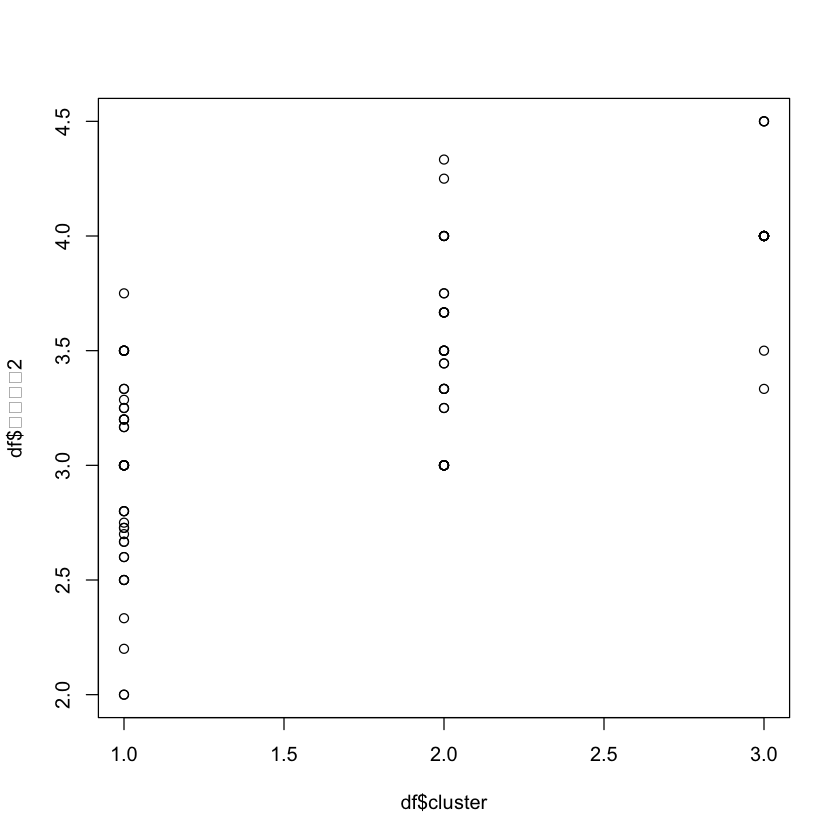

In [391]:
plot(df$cluster,df$조연점수2)

In [399]:
str(df)

'data.frame':	108 obs. of  8 variables:
 $ cluster          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ 스크린점유율     : num  23.8 48.3 36.9 35.3 21.6 ...
 $ 배급사점수       : int  2 2 1 3 3 2 1 3 1 3 ...
 $ 장르_관객점수부여: int  10 10 10 10 10 20 10 10 10 10 ...
 $ 감독_배우시너지  : int  3 8 0 3 0 6 1 5 7 4 ...
 $ 감독점수         : num  3 2 2.33 3.57 3.5 ...
 $ 배우점수         : num  4 8.25 4 6.78 7.67 ...
 $ 조연점수2        : num  2.6 3.25 3 3 3.5 ...


In [418]:


    
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(cluster ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("SVM의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

SVM(data.tr , data.test , x , y )


SVM의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  4  1
   2  0  6  0
   3  0  1  7


[1] 0.8064516

In [414]:
df2 <- df
df2$cluster <- as.factor(df2$cluster)
    
fun_x(df2,2:8,'cluster')
    


# weights:  36
initial  value 103.950561 
iter  10 value 36.920513
iter  20 value 29.746257
iter  30 value 23.903475
iter  40 value 23.491590
iter  50 value 22.022463
iter  60 value 21.938727
iter  70 value 21.903253
iter  80 value 21.898298
iter  90 value 21.890713
iter 100 value 21.878489
final  value 21.878489 
stopped after 100 iterations
인공신경망의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  4  1
   2  0  4  0
   3  0  3  7
의사결정 나무의 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  4  1
   2  2  3  0
   3  0  4  7
랜덤포레스트 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  3  1
   2  0  4  0
   3  0  4  7
SVM의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  4  1
   2  0  6  0
   3  0  1  7
# weights:  27 (16 variable)
initial  value 84.593146 
iter  10 value 35.262675
iter  20 value 33.203227
final  value 32.817002 
converged
로지스틱 회귀의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  4  0
   2  0  4  1
   3  0  3  7
# weights:  36
initial  value 100.278479 
iter  10 value 35.893547
iter  2

initial  value 91.720719 
iter  10 value 39.978404
iter  20 value 30.406386
iter  30 value 24.366320
iter  40 value 22.998528
iter  50 value 22.233183
iter  60 value 21.528810
iter  70 value 21.409560
iter  80 value 21.234212
iter  90 value 21.146854
iter 100 value 21.073867
final  value 21.073867 
stopped after 100 iterations
인공신경망의 예측력은 0.8961039 입니다.    y
pred  1  2  3
   1 27  3  0
   2  4 23  1
   3  0  0 19
의사결정 나무의 예측력은 0.7532468 입니다.    y
pred  1  2  3
   1 27 11  0
   2  4 12  1
   3  0  3 19
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.8051948 입니다.    y
pred  1  2  3
   1 26  7  0
   2  5 17  1
   3  0  2 19
# weights:  27 (16 variable)
initial  value 84.593146 
iter  10 value 35.262675
iter  20 value 33.203227
final  value 32.817002 
converged
로지스틱 회귀의 예측력은 0.8181818 입니다.    y
pred  1  2  3
   1 27  6  0
   2  4 17  1
   3  0  3 19
# weights:  36
initial  value 99.989706 
iter  10 value 39.671361
iter  20 value 23.790184
iter  3

initial  value 84.593146 
iter  10 value 35.262675
iter  20 value 33.203227
final  value 32.817002 
converged
로지스틱 회귀의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  4  0
   2  0  4  1
   3  0  3  7
# weights:  36
initial  value 93.181067 
iter  10 value 37.885063
iter  20 value 28.807644
iter  30 value 22.241136
iter  40 value 20.903025
iter  50 value 18.951564
iter  60 value 18.403998
iter  70 value 16.639989
iter  80 value 16.347236
iter  90 value 16.252090
iter 100 value 16.241407
final  value 16.241407 
stopped after 100 iterations
인공신경망의 예측력은 0.9350649 입니다.    y
pred  1  2  3
   1 31  3  0
   2  0 21  0
   3  0  2 20
의사결정 나무의 예측력은 0.7532468 입니다.    y
pred  1  2  3
   1 27 11  0
   2  4 12  1
   3  0  3 19
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.8051948 입니다.    y
pred  1  2  3
   1 26  7  0
   2  5 17  1
   3  0  2 19
# weights:  27 (16 variable)
initial  value 84.593146 
iter  10 value 35.262675
iter  20 value 33.203227
final  

initial  value 88.286959 
iter  10 value 45.118574
iter  20 value 34.616924
iter  30 value 30.261243
iter  40 value 24.511045
iter  50 value 15.878605
iter  60 value 15.746941
iter  70 value 15.745703
iter  80 value 15.745479
iter  90 value 15.745418
final  value 15.745388 
converged
인공신경망의 예측력은 0.7741935 입니다.    y
pred  1  2  3
   1 12  4  0
   2  0  5  1
   3  0  2  7
의사결정 나무의 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  4  1
   2  2  3  0
   3  0  4  7
랜덤포레스트 예측력은 0.7096774 입니다.    y
pred  1  2  3
   1 12  4  0
   2  0  3  1
   3  0  4  7
SVM의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  4  1
   2  0  6  0
   3  0  1  7
# weights:  27 (16 variable)
initial  value 84.593146 
iter  10 value 35.262675
iter  20 value 33.203227
final  value 32.817002 
converged
로지스틱 회귀의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  4  0
   2  0  4  1
   3  0  3  7
# weights:  36
initial  value 92.342463 
iter  10 value 43.573341
iter  20 value 29.592582
iter  30 value 23.467388
iter  40 value 21.

initial  value 84.615981 
iter  10 value 37.531677
iter  20 value 30.102196
iter  30 value 23.638682
iter  40 value 20.929880
iter  50 value 20.167303
iter  60 value 20.113343
iter  70 value 20.073123
iter  80 value 20.063005
iter  90 value 20.060757
iter 100 value 20.058177
final  value 20.058177 
stopped after 100 iterations
인공신경망의 예측력은 0.7096774 입니다.    y
pred 1 2 3
   1 9 2 0
   2 3 6 1
   3 0 3 7
의사결정 나무의 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  4  1
   2  2  3  0
   3  0  4  7
랜덤포레스트 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  3  1
   2  0  4  0
   3  0  4  7
SVM의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  4  1
   2  0  6  0
   3  0  1  7
# weights:  27 (16 variable)
initial  value 84.593146 
iter  10 value 35.262675
iter  20 value 33.203227
final  value 32.817002 
converged
로지스틱 회귀의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 12  4  0
   2  0  4  1
   3  0  3  7
# weights:  36
initial  value 90.720318 
iter  10 value 44.818168
iter  20 value 33.702024
iter  30 va

,train,test
인공신경망,0.8954545,0.7290323
의사결정나무,0.7532468,0.6451613
RandomForest,1.0000000,0.7193548
SVM,0.8051948,0.8064516
로지스틱회귀분석,0.8181818,0.7419355


In [410]:
result

train,test
0.8954545,0.7290323
0.7532468,0.6451613
1.0000000,0.7193548
0.8051948,0.8064516
0.8181818,0.7419355


In [406]:
result

train,test
0.7428571,0.5983871
0.7532468,0.6451613
1.0000000,0.7209677
0.8051948,0.8064516
0.8181818,0.7419355


In [379]:
result

train,test
0.8077922,0.6887097
0.7272727,0.6774194
1.0000000,0.7064516
0.8441558,0.8064516
0.8571429,0.7419355


In [367]:
result

train,test
0.8220779,0.6838710
0.7272727,0.6774194
1.0000000,0.7016129
0.8571429,0.8064516
0.8701299,0.7419355


In [350]:
result

train,test
0.8902597,0.7080645
0.7272727,0.6774194
1.0000000,0.7854839
0.8051948,0.8064516
0.8571429,0.7741935


In [344]:
result

train,test
0.8993506,0.6903226
0.7272727,0.6774194
1.0000000,0.7225806
0.7792208,0.8064516
0.7532468,0.7419355


In [337]:
result

train,test
0.8974026,0.7177419
0.7272727,0.6774194
1.0000000,0.7370968
0.8181818,0.7741935
0.8181818,0.7419355


In [319]:
result

train,test
1.000000,0.8967742
0.987013,0.9354839
1.000000,0.9500000
0.987013,0.9354839
1.000000,0.9032258


In [280]:
result

train,test
0.7909091,0.6677419
0.7272727,0.6774194
1.0000000,0.7225806
0.8441558,0.8064516
0.7662338,0.7096774


In [275]:
result

train,test
0.6188312,0.6032258
0.7272727,0.6774194
1.0000000,0.7080645
0.8441558,0.8064516
0.8051948,0.7096774


In [270]:
result

train,test
0.6175325,0.5419355
0.7272727,0.6774194
1.0000000,0.7387097
0.8571429,0.7741935
0.7922078,0.7096774


In [266]:
result

train,test
0.8064935,0.6338710
0.7272727,0.6774194
1.0000000,0.7290323
0.8701299,0.7741935
0.7792208,0.7419355


In [260]:
#기존 + 감독점수 1235
result

train,test
0.8655844,0.6532258
0.7272727,0.6774194
1.0000000,0.7500000
0.7922078,0.7741935
0.7272727,0.7096774


In [247]:
#all 1235
result

train,test
0.7681818,0.6516129
0.7272727,0.6774194
1.0000000,0.7177419
0.8441558,0.8064516
0.8051948,0.7096774


In [251]:
#스크린점유율, 평스점유율 1235
result

train,test
0.8883117,0.6838710
0.7272727,0.6774194
1.0000000,0.6951613
0.7922078,0.8064516
0.7662338,0.6774194


In [242]:
#스크린점유율,평스 증가율 1235
result

train,test
0.7909091,0.6677419
0.7272727,0.6774194
1.0000000,0.7225806
0.8441558,0.8064516
0.7662338,0.7096774


In [226]:
#평스,평스 증가률 1235
result

train,test
0.7642857,0.6370968
0.7272727,0.6774194
1.0000000,0.6806452
0.8441558,0.7741935
0.7662338,0.6774194


In [237]:
#평스 증가률 1235
result

train,test
0.8850649,0.6758065
0.7272727,0.6774194
1.0000000,0.6774194
0.8311688,0.7419355
0.7662338,0.6774194


In [232]:
#평스 1235
result

train,test
0.8675325,0.6870968
0.7272727,0.6774194
1.0000000,0.7161290
0.8181818,0.7741935
0.7272727,0.7096774


In [168]:
#-기존 1235
result

train,test
0.8993506,0.6903226
0.7272727,0.6774194
1.0000000,0.7225806
0.7792208,0.8064516
0.7532468,0.7419355


In [172]:
#- 장르 1235
result

train,test
0.8876623,0.7338710
0.7272727,0.6774194
1.0000000,0.7129032
0.7922078,0.7741935
0.7662338,0.7419355


In [174]:
str(df2)

'data.frame':	108 obs. of  7 variables:
 $ cluster        : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ 스크린점유율   : num  23.8 48.3 36.9 35.3 21.6 ...
 $ 배급사점수     : int  2 2 1 3 3 2 1 3 1 3 ...
 $ 감독_배우시너지: int  3 8 0 3 0 6 1 5 7 4 ...
 $ 감독점수       : num  3 2 2.33 3.57 3.5 ...
 $ 배우점수       : num  4 8.25 4 6.78 7.67 ...
 $ 조연점수       : num  8 12.2 10.6 10.6 14.5 ...


In [175]:
df2$cluster <- as.numeric(df2$cluster)

In [176]:
# princomp
model_iris<- lm(cluster ~ . ,data= df2)
model_iris


Call:
lm(formula = cluster ~ ., data = df2)

Coefficients:
    (Intercept)     스크린점유율       배급사점수  감독_배우시너지  
      -0.757583         0.013005        -0.002267        -0.023366  
       감독점수         배우점수         조연점수  
       0.074615         0.063823         0.094284  


In [178]:
summary(model_iris)


Call:
lm(formula = cluster ~ ., data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25911 -0.32412 -0.03209  0.37121  1.20179 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.757583   0.280925  -2.697  0.00821 ** 
스크린점유율     0.013005   0.004823   2.697  0.00821 ** 
배급사점수      -0.002267   0.076928  -0.029  0.97655    
감독_배우시너지 -0.023366   0.018111  -1.290  0.19995    
감독점수         0.074615   0.024349   3.064  0.00280 ** 
배우점수         0.063823   0.013797   4.626 1.11e-05 ***
조연점수         0.094284   0.016861   5.592 1.92e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4926 on 101 degrees of freedom
Multiple R-squared:  0.6443,	Adjusted R-squared:  0.6232 
F-statistic:  30.5 on 6 and 101 DF,  p-value: < 2.2e-16


In [177]:
reduced2 <- step(model_iris, direction = "backward" )


Start:  AIC=-146.16
cluster ~ 스크린점유율 + 배급사점수 + 감독_배우시너지 + 
    감독점수 + 배우점수 + 조연점수

                  Df Sum of Sq    RSS     AIC
- 배급사점수       1    0.0002 24.511 -148.16
- 감독_배우시너지  1    0.4039 24.915 -146.40
<none>                         24.511 -146.16
- 스크린점유율     1    1.7646 26.276 -140.66
- 감독점수         1    2.2790 26.790 -138.56
- 배우점수         1    5.1932 29.704 -127.41
- 조연점수         1    7.5882 32.099 -119.04

Step:  AIC=-148.16
cluster ~ 스크린점유율 + 감독_배우시너지 + 감독점수 + 
    배우점수 + 조연점수

                  Df Sum of Sq    RSS     AIC
- 감독_배우시너지  1    0.4043 24.916 -148.40
<none>                         24.511 -148.16
- 스크린점유율     1    1.7736 26.285 -142.62
- 감독점수         1    2.2927 26.804 -140.51
- 배우점수         1    5.4705 29.982 -128.41
- 조연점수         1    7.6208 32.132 -120.92

Step:  AIC=-148.4
cluster ~ 스크린점유율 + 감독점수 + 배우점수 + 
    조연점수

               Df Sum of Sq    RSS     AIC
<none>                      24.916 -148.40
- 스크린점유율  1    1.3986 26.314 -144.50
- 감독점수      1    2.01

In [131]:
# 특성공학
temp_result<-c()
for(i in 1:5){
    
df<- df10[,c(1,3,4,5,6,7)]
df<-cbind(df,배우점수 =df10[,i+7])

df2 <- df

df2$cluster <- as.factor(df2$cluster)
fun_x(df2,2:6,'cluster')
    temp_result <- rbind(temp_result , result)
}


# weights:  33
initial  value 100.266527 
iter  10 value 58.160564
iter  20 value 52.718789
iter  30 value 49.513721
iter  40 value 44.304649
iter  50 value 41.993668
iter  60 value 41.312865
iter  70 value 41.211711
iter  80 value 41.187288
iter  90 value 41.183016
iter 100 value 41.175606
final  value 41.175606 
stopped after 100 iterations
인공신경망의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 11  5  1
   2  1  5  0
   3  0  1  7
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 4 5 1
   2 8 5 2
   3 0 1 5
랜덤포레스트 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 11  7  1
   2  1  3  2
   3  0  1  5
SVM의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 7 3 1
   2 4 3 1
   3 1 5 6
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930236 
converged
로지스틱 회귀의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 7 3 1
   2 5 6 3
   3 0 2 4
# weights:  33
initial  value 85.351983 
iter  10 value 58.901191
iter  20 value 46.861381
iter  30 value 41.72

initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930236 
converged
로지스틱 회귀의 예측력은 0.7142857 입니다.    y
pred  1  2  3
   1 25  7  0
   2  5 14  4
   3  1  5 16
# weights:  33
initial  value 94.181389 
iter  10 value 53.047580
iter  20 value 49.439399
iter  30 value 44.904755
iter  40 value 41.067870
iter  50 value 36.778207
iter  60 value 33.582017
iter  70 value 32.048367
iter  80 value 31.527449
iter  90 value 31.480978
iter 100 value 31.456032
final  value 31.456032 
stopped after 100 iterations
인공신경망의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 4 0
   2 2 4 4
   3 1 3 4
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 4 5 1
   2 8 5 2
   3 0 1 5
랜덤포레스트 예측력은 0.6774194 입니다.    y
pred  1  2  3
   1 11  5  1
   2  1  5  2
   3  0  1  5
SVM의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 7 3 1
   2 4 3 1
   3 1 5 6
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930236 
converged
로지

initial  value 96.198356 
iter  10 value 66.462803
iter  20 value 50.655140
iter  30 value 46.967138
iter  40 value 44.283595
iter  50 value 42.553124
iter  60 value 41.307531
iter  70 value 37.564690
iter  80 value 36.230486
iter  90 value 36.004799
iter 100 value 35.687892
final  value 35.687892 
stopped after 100 iterations
인공신경망의 예측력은 0.7792208 입니다.    y
pred  1  2  3
   1 24  6  0
   2  6 17  1
   3  1  3 19
의사결정 나무의 예측력은 0.6883117 입니다.    y
pred  1  2  3
   1 17  3  0
   2 14 20  4
   3  0  3 16
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.8051948 입니다.    y
pred  1  2  3
   1 25  6  1
   2  5 18  0
   3  1  2 19
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930236 
converged
로지스틱 회귀의 예측력은 0.7142857 입니다.    y
pred  1  2  3
   1 25  7  0
   2  5 14  4
   3  1  5 16
# weights:  33
initial  value 85.795415 
iter  10 value 82.214586
iter  20 value 63.120900
iter  3

initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930236 
converged
로지스틱 회귀의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 7 3 1
   2 5 6 3
   3 0 2 4
# weights:  33
initial  value 89.829230 
iter  10 value 66.289342
iter  20 value 49.448443
iter  30 value 43.551808
iter  40 value 39.196645
iter  50 value 37.874623
iter  60 value 37.587213
iter  70 value 37.417351
iter  80 value 37.403465
iter  90 value 37.397839
iter 100 value 37.380506
final  value 37.380506 
stopped after 100 iterations
인공신경망의 예측력은 0.7922078 입니다.    y
pred  1  2  3
   1 26  7  0
   2  4 15  0
   3  1  4 20
의사결정 나무의 예측력은 0.6883117 입니다.    y
pred  1  2  3
   1 17  3  0
   2 14 20  4
   3  0  3 16
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.8051948 입니다.    y
pred  1  2  3
   1 25  6  1
   2  5 18  0
   3  1  2 19
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930

initial  value 118.409948 
iter  10 value 68.513019
iter  20 value 48.427865
iter  30 value 42.535866
iter  40 value 39.442760
iter  50 value 37.912592
iter  60 value 37.313803
iter  70 value 29.896424
iter  80 value 28.153297
iter  90 value 27.610585
iter 100 value 27.295648
final  value 27.295648 
stopped after 100 iterations
인공신경망의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 6 3 1
   2 5 5 3
   3 1 3 4
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 4 5 1
   2 8 5 2
   3 0 1 5
랜덤포레스트 예측력은 0.6774194 입니다.    y
pred  1  2  3
   1 11  4  1
   2  1  5  2
   3  0  2  5
SVM의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 7 3 1
   2 4 3 1
   3 1 5 6
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 51.373808
iter  20 value 47.930361
final  value 47.930236 
converged
로지스틱 회귀의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 7 3 1
   2 5 6 3
   3 0 2 4
# weights:  33
initial  value 86.182521 
iter  10 value 70.204167
iter  20 value 46.293527
iter  30 value 44.426277
iter  40 value 43.87075

initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.7922078 입니다.    y
pred  1  2  3
   1 26  5  0
   2  5 17  2
   3  0  4 18
# weights:  33
initial  value 89.431838 
iter  10 value 47.627389
iter  20 value 35.840110
iter  30 value 33.226012
iter  40 value 27.699124
iter  50 value 24.153836
iter  60 value 24.060838
iter  70 value 24.056926
final  value 24.056808 
converged
인공신경망의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 8 4 1
   2 4 5 3
   3 0 2 4
의사결정 나무의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 9 7 2
   2 2 2 2
   3 1 2 4
랜덤포레스트 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 6 1
   2 3 3 3
   3 0 2 4
SVM의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 8 6 2
   2 3 3 2
   3 1 2 4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 5 1
   2 2 4 3
   3 1 2 4
# weights:  33
initial  value 98

initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.7922078 입니다.    y
pred  1  2  3
   1 26  5  0
   2  5 17  2
   3  0  4 18
# weights:  33
initial  value 91.317028 
iter  10 value 79.969313
iter  20 value 42.113065
iter  30 value 38.990161
iter  40 value 37.834213
iter  50 value 37.005202
iter  60 value 36.134899
iter  70 value 34.029958
iter  80 value 28.707914
iter  90 value 27.639649
iter 100 value 26.749051
final  value 26.749051 
stopped after 100 iterations
인공신경망의 예측력은 0.4193548 입니다.    y
pred 1 2 3
   1 7 6 1
   2 4 2 3
   3 1 3 4
의사결정 나무의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 9 7 2
   2 2 2 2
   3 1 2 4
랜덤포레스트 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 5 1
   2 3 4 3
   3 0 2 4
SVM의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 8 6 2
   2 3 3 2
   3 1 2 4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0

initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.7922078 입니다.    y
pred  1  2  3
   1 26  5  0
   2  5 17  2
   3  0  4 18
# weights:  33
initial  value 93.715149 
iter  10 value 80.782408
iter  20 value 47.090494
iter  30 value 37.028523
iter  40 value 34.498275
iter  50 value 31.348942
iter  60 value 29.549096
iter  70 value 29.309214
iter  80 value 29.308316
final  value 29.308261 
converged
인공신경망의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 7 5 1
   2 3 3 3
   3 2 3 4
의사결정 나무의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 9 7 2
   2 2 2 2
   3 1 2 4
랜덤포레스트 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 6 1
   2 3 3 3
   3 0 2 4
SVM의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 8 6 2
   2 3 3 2
   3 1 2 4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 5 1
   2 2 4 3
   3 1 2 4
# weigh

initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.7922078 입니다.    y
pred  1  2  3
   1 26  5  0
   2  5 17  2
   3  0  4 18
# weights:  33
initial  value 88.387520 
iter  10 value 61.243007
iter  20 value 41.821254
iter  30 value 40.436399
iter  40 value 37.994660
iter  50 value 34.861083
iter  60 value 32.988961
iter  70 value 32.723334
iter  80 value 32.511015
iter  90 value 32.011586
iter 100 value 31.923455
final  value 31.923455 
stopped after 100 iterations
인공신경망의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 7 5 1
   2 4 3 2
   3 1 3 5
의사결정 나무의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 9 7 2
   2 2 2 2
   3 1 2 4
랜덤포레스트 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 6 2
   2 3 3 2
   3 0 2 4
SVM의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 8 6 2
   2 3 3 2
   3 1 2 4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 44.477256
iter  20 value 37.348236
final  value 37.312531 
converged
로지스틱 회귀의 예측력은 0.5

initial  value 84.593146 
iter  10 value 62.714374
iter  20 value 61.979075
final  value 61.979061 
converged
로지스틱 회귀의 예측력은 0.5844156 입니다.    y
pred  1  2  3
   1 24  9  1
   2  7  9  7
   3  0  8 12
# weights:  33
initial  value 100.239375 
iter  10 value 73.202015
iter  20 value 53.765678
iter  30 value 48.012930
iter  40 value 46.590379
iter  50 value 46.482498
iter  60 value 46.451608
iter  70 value 46.381373
iter  80 value 46.374249
iter  90 value 46.374033
final  value 46.373702 
converged
인공신경망의 예측력은 0.5483871 입니다.    y
pred  1  2  3
   1 10  7  0
   2  1  1  2
   3  1  3  6
의사결정 나무의 예측력은 0.4193548 입니다.    y
pred 1 2 3
   1 8 8 3
   2 0 0 0
   3 4 3 5
랜덤포레스트 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 10  5  1
   2  2  4  3
   3  0  2  4
SVM의 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 10  4  1
   2  2  5  3
   3  0  2  4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.714374
iter  20 value 61.979075
final  value 61.979061 
converged
로지스틱 회귀의 예측력은 0.6129

initial  value 84.769159 
iter  10 value 57.731469
iter  20 value 50.857567
iter  30 value 46.560806
iter  40 value 45.031233
iter  50 value 44.922233
iter  60 value 44.823069
iter  70 value 44.608615
iter  80 value 44.603307
iter  90 value 44.599393
iter 100 value 44.586293
final  value 44.586293 
stopped after 100 iterations
인공신경망의 예측력은 0.7012987 입니다.    y
pred  1  2  3
   1 26  5  0
   2  2 10  2
   3  3 11 18
의사결정 나무의 예측력은 0.5584416 입니다.    y
pred  1  2  3
   1 26 12  3
   2  0  0  0
   3  5 14 17
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.7792208 입니다.    y
pred  1  2  3
   1 27  6  1
   2  3 20  6
   3  1  0 13
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.714374
iter  20 value 61.979075
final  value 61.979061 
converged
로지스틱 회귀의 예측력은 0.5844156 입니다.    y
pred  1  2  3
   1 24  9  1
   2  7  9  7
   3  0  8 12
# weights:  33
initial  value 98.365060 
iter  10 value 63.830875
iter  20 value 52.890242
iter  3

initial  value 84.593146 
iter  10 value 62.714374
iter  20 value 61.979075
final  value 61.979061 
converged
로지스틱 회귀의 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 10  6  0
   2  2  3  2
   3  0  2  6
# weights:  33
initial  value 87.422912 
iter  10 value 64.313338
iter  20 value 55.338043
iter  30 value 54.743901
iter  40 value 54.688914
iter  50 value 54.681940
iter  60 value 54.681289
final  value 54.680353 
converged
인공신경망의 예측력은 0.6493506 입니다.    y
pred  1  2  3
   1 27  6  0
   2  0  3  0
   3  4 17 20
의사결정 나무의 예측력은 0.5584416 입니다.    y
pred  1  2  3
   1 26 12  3
   2  0  0  0
   3  5 14 17
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.7792208 입니다.    y
pred  1  2  3
   1 27  6  1
   2  3 20  6
   3  1  0 13
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.714374
iter  20 value 61.979075
final  value 61.979061 
converged
로지스틱 회귀의 예측력은 0.5844156 입니다.    y
pred  1  2  3
   1 24  9  1
   2  7  9  7
   3  0  8 12
# 

initial  value 104.175119 
iter  10 value 72.769098
iter  20 value 55.120254
iter  30 value 53.175810
iter  40 value 50.501668
iter  50 value 45.940091
iter  60 value 42.533763
iter  70 value 41.442433
iter  80 value 41.314067
iter  90 value 41.301677
iter 100 value 41.280385
final  value 41.280385 
stopped after 100 iterations
인공신경망의 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 10  9  0
   2  0  1  1
   3  2  1  7
의사결정 나무의 예측력은 0.4193548 입니다.    y
pred 1 2 3
   1 8 8 3
   2 0 0 0
   3 4 3 5
랜덤포레스트 예측력은 0.5483871 입니다.    y
pred  1  2  3
   1 10  6  1
   2  2  2  2
   3  0  3  5
SVM의 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 10  4  1
   2  2  5  3
   3  0  2  4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.714374
iter  20 value 61.979075
final  value 61.979061 
converged
로지스틱 회귀의 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 10  6  0
   2  2  3  2
   3  0  2  6
# weights:  33
initial  value 82.169232 
iter  10 value 58.061210
iter  20 value 46.260400
iter  30 v

initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0.6623377 입니다.    y
pred  1  2  3
   1 26  9  0
   2  3 11  6
   3  2  6 14
# weights:  33
initial  value 97.530117 
iter  10 value 78.521088
iter  20 value 57.742147
iter  30 value 46.211219
iter  40 value 45.499814
iter  50 value 45.042465
iter  60 value 44.450086
iter  70 value 44.202030
iter  80 value 44.089860
iter  90 value 43.896986
iter 100 value 43.723644
final  value 43.723644 
stopped after 100 iterations
인공신경망의 예측력은 0.6451613 입니다.    y
pred 1 2 3
   1 7 1 0
   2 2 6 1
   3 3 4 7
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 9 5 3
   2 0 0 0
   3 3 6 5
랜덤포레스트 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 8 2 0
   2 2 6 4
   3 2 3 4
SVM의 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 9 3 1
   2 1 6 4
   3 2 2 3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은

initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0.6623377 입니다.    y
pred  1  2  3
   1 26  9  0
   2  3 11  6
   3  2  6 14
# weights:  33
initial  value 94.615100 
iter  10 value 63.535073
iter  20 value 50.761248
iter  30 value 45.634977
iter  40 value 45.341627
iter  50 value 43.762491
iter  60 value 43.745385
iter  70 value 43.743691
iter  80 value 43.740520
iter  90 value 43.725382
iter 100 value 43.720571
final  value 43.720571 
stopped after 100 iterations
인공신경망의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 2 1
   3 3 9 7
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 9 5 3
   2 0 0 0
   3 3 6 5
랜덤포레스트 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 8 2 1
   2 2 5 3
   3 2 4 4
SVM의 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 9 3 1
   2 1 6 4
   3 2 2 3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0.5806452 입

initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0.6623377 입니다.    y
pred  1  2  3
   1 26  9  0
   2  3 11  6
   3  2  6 14
# weights:  33
initial  value 85.450048 
iter  10 value 55.559788
iter  20 value 44.648337
iter  30 value 43.239266
iter  40 value 40.873421
iter  50 value 40.424565
iter  60 value 40.369729
iter  70 value 40.367706
iter  80 value 40.365629
iter  90 value 40.346073
iter 100 value 40.329139
final  value 40.329139 
stopped after 100 iterations
인공신경망의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 8 2 1
   2 1 0 0
   3 3 9 7
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 9 5 3
   2 0 0 0
   3 3 6 5
랜덤포레스트 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 8 3 1
   2 2 4 3
   3 2 4 4
SVM의 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 9 3 1
   2 1 6 4
   3 2 2 3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0

initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0.6623377 입니다.    y
pred  1  2  3
   1 26  9  0
   2  3 11  6
   3  2  6 14
# weights:  33
initial  value 94.573401 
iter  10 value 65.397592
iter  20 value 45.741066
iter  30 value 41.655094
iter  40 value 36.733198
iter  50 value 35.929553
iter  60 value 35.780695
iter  70 value 35.768833
iter  80 value 35.766022
final  value 35.766013 
converged
인공신경망의 예측력은 0.483871 입니다.    y
pred 1 2 3
   1 8 3 1
   2 1 0 0
   3 3 8 7
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 9 5 3
   2 0 0 0
   3 3 6 5
랜덤포레스트 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 9 3 2
   2 2 5 2
   3 1 3 4
SVM의 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 9 3 1
   2 1 6 4
   3 2 2 3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.924928
iter  20 value 57.858451
final  value 57.858446 
converged
로지스틱 회귀의 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 8 2 1
   2 3 5 2
   3 1 4 5
# wei

initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 0.6493506 입니다.    y
pred  1  2  3
   1 24  8  0
   2  6 12  6
   3  1  6 14
# weights:  33
initial  value 97.407597 
iter  10 value 71.075492
iter  20 value 52.796991
iter  30 value 35.824176
iter  40 value 31.590381
iter  50 value 30.904360
iter  60 value 30.846822
iter  70 value 30.789227
iter  80 value 30.767267
iter  90 value 30.761109
iter 100 value 30.758910
final  value 30.758910 
stopped after 100 iterations
인공신경망의 예측력은 0.6129032 입니다.    y
pred 1 2 3
   1 8 3 0
   2 3 7 4
   3 1 1 4
의사결정 나무의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 3 2
   2 3 4 3
   3 0 4 3
랜덤포레스트 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 3 1
   2 1 4 4
   3 2 4 3
SVM의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 8 4 1
   2 3 4 5
   3 1 3 2
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 0

initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 0.6493506 입니다.    y
pred  1  2  3
   1 24  8  0
   2  6 12  6
   3  1  6 14
# weights:  33
initial  value 85.176016 
iter  10 value 59.283287
iter  20 value 47.028764
iter  30 value 41.364457
iter  40 value 39.739909
iter  50 value 39.648829
iter  60 value 39.600779
iter  70 value 39.594857
iter  80 value 39.592237
iter  90 value 39.592087
iter 100 value 39.591696
final  value 39.591696 
stopped after 100 iterations
인공신경망의 예측력은 0.6129032 입니다.    y
pred 1 2 3
   1 8 3 0
   2 3 4 1
   3 1 4 7
의사결정 나무의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 3 2
   2 3 4 3
   3 0 4 3
랜덤포레스트 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 3 1
   2 2 4 3
   3 1 4 4
SVM의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 8 4 1
   2 3 4 5
   3 1 3 2
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 

initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 0.6493506 입니다.    y
pred  1  2  3
   1 24  8  0
   2  6 12  6
   3  1  6 14
# weights:  33
initial  value 88.985958 
iter  10 value 56.857978
iter  20 value 46.615448
iter  30 value 41.319726
iter  40 value 40.734356
iter  50 value 40.633114
iter  60 value 40.416296
iter  70 value 40.131083
iter  80 value 39.763953
iter  90 value 39.689428
iter 100 value 39.675568
final  value 39.675568 
stopped after 100 iterations
인공신경망의 예측력은 0.5806452 입니다.    y
pred 1 2 3
   1 7 3 0
   2 4 4 1
   3 1 4 7
의사결정 나무의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 3 2
   2 3 4 3
   3 0 4 3
랜덤포레스트 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 3 0
   2 2 4 4
   3 1 4 4
SVM의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 8 4 1
   2 3 4 5
   3 1 3 2
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 

initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 0.6493506 입니다.    y
pred  1  2  3
   1 24  8  0
   2  6 12  6
   3  1  6 14
# weights:  33
initial  value 135.567388 
iter  10 value 58.978412
iter  20 value 47.676344
iter  30 value 42.247092
iter  40 value 40.591876
iter  50 value 40.422150
iter  60 value 40.385790
iter  70 value 40.351922
iter  80 value 40.345941
iter  90 value 40.344981
iter 100 value 40.273633
final  value 40.273633 
stopped after 100 iterations
인공신경망의 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 11  7  1
   3  1  4  7
의사결정 나무의 예측력은 0.516129 입니다.    y
pred 1 2 3
   1 9 3 2
   2 3 4 3
   3 0 4 3
랜덤포레스트 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 3 1
   2 1 4 3
   3 2 4 4
SVM의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 8 4 1
   2 3 4 5
   3 1 3 2
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 58.102871
iter  20 value 56.554983
final  value 56.554951 
converged
로지스틱 회귀의 예측력은 0

In [53]:
temp_result

train,test
0.7675325,0.6467742
0.6363636,0.6129032
1.0000000,0.6693548
0.7662338,0.6774194
0.7272727,0.7096774
0.7675325,0.6467742
0.6363636,0.6129032
1.0000000,0.6693548
0.7662338,0.6774194
0.7272727,0.7096774


In [54]:

fun_x(df2,2:7,'cluster')


# weights:  33
initial  value 90.784656 
iter  10 value 59.486639
iter  20 value 43.517171
iter  30 value 38.803286
iter  40 value 38.253497
iter  50 value 37.522810
iter  60 value 37.367809
iter  70 value 37.188316
iter  80 value 36.978360
iter  90 value 36.770754
iter 100 value 36.752174
final  value 36.752174 
stopped after 100 iterations
인공신경망의 예측력은 0.5483871 입니다.    y
pred 1 2 3
   1 9 4 1
   2 3 7 6
   3 0 0 1
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 6 2 1
   2 1 1 0
   3 5 8 7
랜덤포레스트 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  5  1
   2  1  4  1
   3  1  2  6
SVM의 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 11  6  1
   2  1  4  4
   3  0  1  3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 
converged
로지스틱 회귀의 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 10  3  1
   2  2  5  3
   3  0  3  4
# weights:  33
initial  value 89.537986 
iter  10 value 57.775272
iter  20 value 41.945805
iter  30

initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 
converged
로지스틱 회귀의 예측력은 0.5974026 입니다.    y
pred  1  2  3
   1 24  9  0
   2  5 11  9
   3  2  6 11
# weights:  33
initial  value 82.148507 
iter  10 value 55.131112
iter  20 value 43.486316
iter  30 value 38.320861
iter  40 value 36.946819
iter  50 value 36.601289
iter  60 value 36.463200
iter  70 value 36.454989
iter  80 value 36.452475
iter  90 value 36.446364
iter 100 value 36.404851
final  value 36.404851 
stopped after 100 iterations
인공신경망의 예측력은 0.6774194 입니다.    y
pred  1  2  3
   1 11  4  0
   2  0  4  2
   3  1  3  6
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 6 2 1
   2 1 1 0
   3 5 8 7
랜덤포레스트 예측력은 0.6774194 입니다.    y
pred  1  2  3
   1 11  4  1
   2  0  5  2
   3  1  2  5
SVM의 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 11  6  1
   2  1  4  4
   3  0  1  3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  valu

initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 
converged
로지스틱 회귀의 예측력은 0.5974026 입니다.    y
pred  1  2  3
   1 24  9  0
   2  5 11  9
   3  2  6 11
# weights:  33
initial  value 87.702490 
iter  10 value 58.972348
iter  20 value 47.252634
iter  30 value 42.632288
iter  40 value 37.913922
iter  50 value 36.126095
iter  60 value 36.104853
iter  70 value 36.101588
iter  80 value 36.100806
iter  90 value 36.100719
iter 100 value 36.100588
final  value 36.100588 
stopped after 100 iterations
인공신경망의 예측력은 0.6451613 입니다.    y
pred 1 2 3
   1 8 3 0
   2 1 4 0
   3 3 4 8
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 6 2 1
   2 1 1 0
   3 5 8 7
랜덤포레스트 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  5  1
   2  1  5  2
   3  1  1  5
SVM의 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 11  6  1
   2  1  4  4
   3  0  1  3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 

initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 
converged
로지스틱 회귀의 예측력은 0.5974026 입니다.    y
pred  1  2  3
   1 24  9  0
   2  5 11  9
   3  2  6 11
# weights:  33
initial  value 91.369869 
iter  10 value 56.135436
iter  20 value 45.630117
iter  30 value 41.630629
iter  40 value 39.665015
iter  50 value 39.586278
iter  60 value 39.582710
iter  70 value 39.582220
final  value 39.582218 
converged
인공신경망의 예측력은 0.6451613 입니다.    y
pred 1 2 3
   1 9 4 0
   2 2 3 0
   3 1 4 8
의사결정 나무의 예측력은 0.4516129 입니다.    y
pred 1 2 3
   1 6 2 1
   2 1 1 0
   3 5 8 7
랜덤포레스트 예측력은 0.6774194 입니다.    y
pred  1  2  3
   1 11  4  1
   2  0  5  2
   3  1  2  5
SVM의 예측력은 0.5806452 입니다.    y
pred  1  2  3
   1 11  6  1
   2  1  4  4
   3  0  1  3
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 
converged
로지스틱 회귀의 예측력은 0.6129032 입니다.    y
pred  1  2  3
   1 10  3  1
   2  2  5  3
   3  0

initial  value 84.593146 
iter  10 value 62.610702
iter  20 value 60.957405
final  value 60.956666 
converged
로지스틱 회귀의 예측력은 0.5974026 입니다.    y
pred  1  2  3
   1 24  9  0
   2  5 11  9
   3  2  6 11
[1] 11.806452  9.032258 13.193548 11.612903 12.258065
[1] 15.37662 10.90909 20.00000 14.54545 11.94805


,train,test
인공신경망,0.7688312,0.5903226
의사결정나무,0.5454545,0.4516129
RandomForest,1.0000000,0.6596774
SVM,0.7272727,0.5806452
로지스틱회귀분석,0.5974026,0.6129032


In [14]:
#배우점수4
result

train,test
0.8337662,0.6516129
0.6363636,0.6129032
1.0000000,0.6709677
0.7662338,0.6774194
0.7272727,0.7096774


In [49]:
#배우점수3
result

train,test
0.9116883,0.7919355
0.7272727,0.7419355
0.9993506,0.8532258
0.7402597,0.6451613
0.8701299,0.8064516


In [44]:
#배우점수2
result

train,test
0.9915584,0.9306452
0.9220779,0.9354839
1.0000000,0.9500000
0.8831169,0.8064516
0.9740260,0.9354839


In [39]:
#SVM, 의사결정나무, 로지스틱회귀분석은 할때 마다 난수 생성을 안하는 듯 (샘플링 난수에만 영향을 받는다.)
result

train,test
0.8337662,0.6516129
0.6363636,0.6129032
1.0000000,0.6709677
0.7662338,0.6774194
0.7272727,0.7096774


In [16]:
#1234
result

train,test
0.9311688,0.8032258
0.8441558,0.8387097
0.9993506,0.8612903
0.8701299,0.8709677
0.8441558,0.8387097


In [163]:
#1235
result

train,test
0.9311688,0.8032258
0.8441558,0.8387097
0.9993506,0.8612903
0.8701299,0.8709677
0.8441558,0.8387097


In [158]:
#1236
result

train,test
0.9577922,0.6322581
0.8701299,0.7741935
0.9993506,0.7854839
0.9090909,0.7419355
0.8701299,0.7096774


In [ ]:
# 요까지가 머신러닝


In [18]:

genre4 <- df

In [93]:
scale<-function(x){
    return((x-min(x))/(max(x)-min(x)))
}

In [99]:
df5<-as.data.frame(lapply(df[,-1],scale))

In [108]:
head(df5,1)

감독_주연조연시너지수,스크린점유율,배우점수
0.4285714,0.5726291,0.625


In [113]:
head(df)

cluster,감독_주연조연시너지수,스크린점유율,배우점수
7232387,6,46.96312,16.0
2535450,0,17.21519,7.0
2963652,0,29.36088,6.5
2242510,3,41.13475,7.0
4039891,3,23.79760,4.0
12811213,0,39.65201,25.0


- lapply 함수는 list + apply를 의미하는 이름의 함수 
- 실행 결과가 list 형태로 출력되는데, 리스트(list)의 인자는 length( 데이터 ) 만큼 생성된다.
- 참고로 데이터프레임(data frame)인 경우 length( 데이터 )의 결과는 변수의 개수(열의 개수)이고, 리스트인 경우 length( 데이터 )는 리스트 인자의 개수이다.


In [112]:
model = knnreg(cluster ~ ., data = df)
model

5-nearest neighbor regression model

In [114]:

inTrain <- createDataPartition(df, p = .7)[[1]]

Warning message in createDataPartition(df, p = 0.7):
“Some classes have no records (  ) and these will be ignored”Warning message in createDataPartition(df, p = 0.7):
“Some classes have a single record (  ) and these will be selected for the sample”

In [119]:
head(df)

cluster,감독_주연조연시너지수,스크린점유율,배우점수
7232387,6,46.96312,16.0
2535450,0,17.21519,7.0
2963652,0,29.36088,6.5
2242510,3,41.13475,7.0
4039891,3,23.79760,4.0
12811213,0,39.65201,25.0


In [121]:
str(df)

'data.frame':	209 obs. of  4 variables:
 $ cluster              : int  7232387 2535450 2963652 2242510 4039891 12811213 3678156 2598859 2368267 4529876 ...
 $ 감독_주연조연시너지수: int  6 0 0 3 3 0 8 4 0 4 ...
 $ 스크린점유율         : num  47 17.2 29.4 41.1 23.8 ...
 $ 배우점수             : num  16 7 6.5 7 4 25 8.25 5 3 5 ...


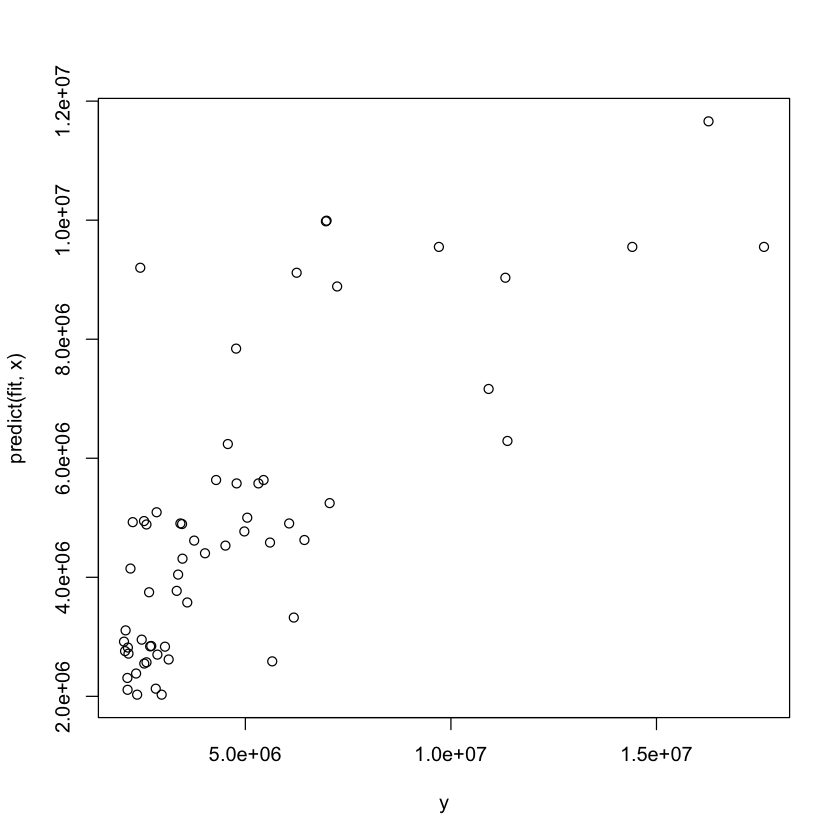

In [122]:
# NOT RUN {

samp <- createDataPartition(df[,1] , p = 0.7,list = F)
data.tr <- df[samp,]
data.test <- df[-samp,]

x <- data.test[,-1]
y <- data.test[,1]

fit <- knnreg(data.tr[,2:4],data.tr[,1], k = 3)

plot(y, predict(fit, x))

# }


In [123]:
predict(fit, x)

[1]  8885933  9550709  5634348  2619323  4770254  7164133  4616623  7842121
 [9]  3577098  4904591  2701067 11660471  6238847  2128651  5577357  4583602
[17]  2551018  9991332  2819592  3108072  9550709  2383605  2109987  2759870
[25]  4146822  6290678  5577357  4894923  2028071  2952525  9116441  3748546
[33]  2919036  2845783  2834252  2839539  2028071  9550709  2717816  5634348
[41]  4887446  3323448  4045532  4532424  4403405  4626263  2571617  9980781
[49]  5246402  4904591  9200756  4944670  2587678  2308924  5001496  4312958
[57]  3771988  5092684  9032815  4926661

In [101]:
CrossTable(x = genre5.testLabels, y = genre5_model, prop.chisq = FALSE )


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  59 

 
                  | genre5_model 
genre5.testLabels |   5317959 |   5508017 |   8666208 |   9707581 |  12706483 |  12983330 |  14411775 |  17615039 | Row Total | 
------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
                0 |         1 |         6 |         4 |         0 |         0 |         6 |         6 |         4 |        27 | 
                  |     0.037 |     0.222 |     0.148 |     0.000 |     0.000 |     0.222 |     0.222 |     0.148 |     0.458 | 
                  |     0.500 |     0.545 |     0.444 |     0.000 |     0.000 |     0.353 |     0.500 |     0.667 |           | 
                  |     0.017 |     0.102 |     0.068 |     0.000 |     0.000 |     0.102 |   

In [125]:
library(knitr)

In [123]:
.Random.seed

[1]       10403         624 -1564105589   103469648  -280462831  -984769378
  [7] -1934069625  2112878364    -3060371  -923367094   -72437181   473245352
 [13]  1882094729 -1374310730   804398527  -695079692   685187941  -998737694
 [19]  -344045829  1152685568  -969269759  -837741618  -176401929   917384652
 [25]  -811988899   421686138  1266631347   771653720  1101610617  1798056934
 [31]  1015010607  -983557724   149281877 -1466515182  1771603307  -749451856
 [37]  -944390671  -450930946  1753321319  -747696004    71466829  1224989098
 [43] -2083721437  -496810488 -1709867927  -152111850  -723361633  1489924692
 [49]   192139589  -559671998 -1279565861  -792403616   242899425   678127150
 [55]   945760471   572366636  1912189501 -1522674726  1243527059 -1585547336
 [61]   907163225  1873873478  2022754319 -1373112572  1955594805 -1448905358
 [67] -1706174901  1518430480  1963389393    44581214  -311681465 -1151018532
 [73]   145662253  1932745226   901487619   707466600   167668809  1485138806
 [79]   348261247 -2055755852 -1677103323  -581443166 -1753814853  1019534528
 [85] -2053470783  1531504782 -1245745225 -1297104756 -1005564899   554134586
 [91]  1068145779  1107566360   838409785  -918611802  1953311471  -242711452
 [97]  -579921899   239360466  1058903851 -1567998864  1781798321  -964666434
[103]  -718267097  1177113404 -1685212403  1973226090   850573539  1701090504
[109]  -505328599 -1636757034 -1337383329   132484372 -2012218107 -1045701118
[115] -1360469605  -980645856  -594370143 -1253991698   357901975 -1900244500
[121]  1918227965 -1063832422   458944851  2003269240  1431696921 -1452386554
[127] -1630732849 -1864777276  -822403595 -1651413454   -29374453 -1639530544
[133]   372582801 -1522555362   897944583   806648988   123188461   173599434
[139] -1209383485  1911014440 -1078584311  -532027338  1143976255 -1217387916
[145] -1191216411 -1732769182 -1370928517 -1812733056 -1067799167  1357741390
[151]  1524125047   144446284  -448639011  1141189882  -395856333   360742360
[157]  1008778745 -1915304602  1114128559 -1183600860   279712725   715305618
[163]   434923755   747565872  -469619343  -545382274 -2145096985  -511814148
[169]  1384425165  2004810538   513426083 -1718836344 -1116414999 -2119700842
[175]  1227729951 -1754306604  1414523077  2073323202  -439344293 -1127026976
[181]  -638932639   350523310  -436149161   514213036  1095612861  -144091814
[187]  -838276333  1546073400   -28215847  1074815942 -2047413361  -995210108
[193] -1510344267 -1802492174  1885043147   406509200   982720849 -2116826402
[199] -2101036601  1858002780  1066174637 -1893254262  -604328061 -1842662680
[205]  1897237449   841164022   335222527  -683975372 -1149679963 -1889995998
[211]  1102408763  1090628160  -835021503 -1279340018  1921444663  2066949644
[217]  1727009693 -1294225990   259428339  -147612520   803216825  -709676506
[223]  1815156335   937531876  -832778347  -965620910  2076506795   404908528
[229]  2095056177  1691919678  1730050215 -1741809476  1290230413 -1352029206
[235] -2126279581  2107339336  -326095959  -313291946  -716181025  -768867692
[241] -1946971003    85831554  1244734747   223876512  1044541729 -1407957906
[247]   404906519  1956296556  -224305795  -629918182   199795923   -25316360
[253]  -523979367 -1336463226  -741430961  -999975100    88905077 -1218469966
[259]  1382083467  -820138672   165730577   757378974 -1293310073  -903609828
[265] -1257431955 -1034007478 -1146300093  -373988952 -1109607543   -86957642
[271] -1713095489   261707764 -1623797147   435854306   595283451   -89247488
[277]  -956678911  1216145102  1250642167   221575372  1020893021  1581969018
[283]  1050094003  -170034344 -1661518471  2106875622  2005380143  1200768164
[289]    37833557  1785832466 -1503179669  -872111952  1015913713  1263528446
[295]  1205749351   486054780  1853214285  1042095274  1416533539  -799997688
[301]  -286049431  -298588138  1248851871  1121672532   180027461   386381890
[307] -1916016933  -8412

[1] 0.5858003